# USER CLUSTERING (based on users interactions and relevance)

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




In [23]:

users = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\filtered_users.csv")
users.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,2010-06-14 21:44:28,555,141,203,"2015,2016","ElaFwOTdEpkiYPkHMpOwXQ, nbnftigv3fj8oS6k-waLYQ...",5,...,0,0,0,0,11,8,21,21,12,0
1,OlJ9vcVFB1iEKcZO-MS3cQ,Joz Joz Joz,348,2006-03-03 08:10:12,2063,1260,1537,"2006,2007,2008,2009,2010,2011,2012","iBeN7TtSJrq-dLwj-EevFw, oSN3M4_WKdlTsnpgqPDiBg...",116,...,32,27,47,6,183,543,462,462,87,29


In [24]:
# ignoring future warning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [25]:
users.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000,158911.000000
mean,34.336692,72.777718,28.091196,45.674988,2.344621,3.756961,2.621600,0.534620,0.418391,0.239600,0.187224,2.581520,5.898188,4.827633,4.827633,1.845568,2.911126
std,132.192997,1231.679824,747.750454,1098.046408,24.804665,1.043745,102.231299,38.444233,45.453779,35.681798,33.554336,69.075165,287.567396,180.489572,180.489572,64.103121,264.529886
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,3.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.000000,0.000000,1.000000,0.000000,3.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,16.000000,3.000000,4.000000,0.000000,4.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,195814.000000,3493.000000,5.000000,24348.000000,13501.000000,14180.000000,13654.000000,12669.000000,15927.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


In [26]:
users["review_count"].describe()

count    158911.000000
mean         34.336692
std         132.192997
min           0.000000
25%           3.000000
50%           8.000000
75%          23.000000
max       17473.000000
Name: review_count, dtype: float64

In [27]:
users.isnull().sum()

user_id                    0
name                       1
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 147337
friends                62101
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

In [28]:
# creating a copy of the dataframe

users_copy = users.copy()

FEATURES ANALYSIS

In [29]:
# converting friends and elite to strings
users_copy["friends"] = users_copy["friends"].astype(str)
users_copy["elite"] = users_copy["elite"].astype(str)

# Creating two new columns with the number of friends and the number of elite years
users_copy["n_friends"] = users_copy["friends"].apply(lambda x: len(x.split(",")) if x != "None" else 0)
users_copy["n_elite"] = users_copy["elite"].apply(lambda x: len(x.split(",")) if x != "None" else 0)

# Dropping the columns 'friends' and 'elite'
users_copy.drop(columns=["friends", "elite"], inplace=True)


VARIABLES CHECK AND REMOVING OUTLIERS

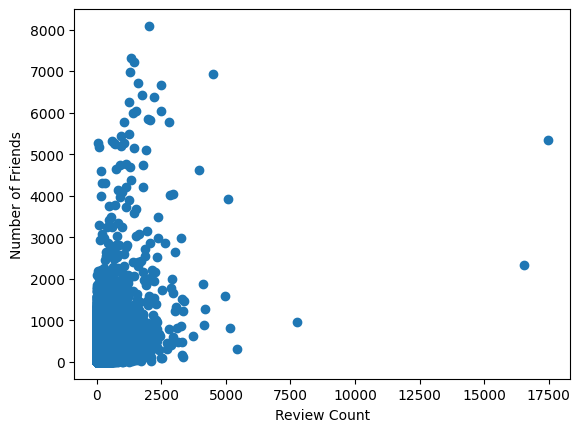

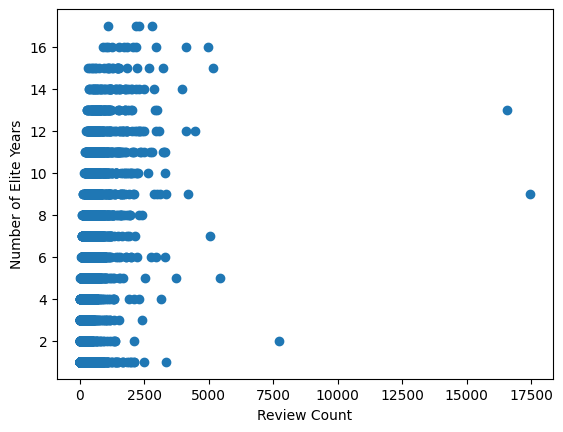

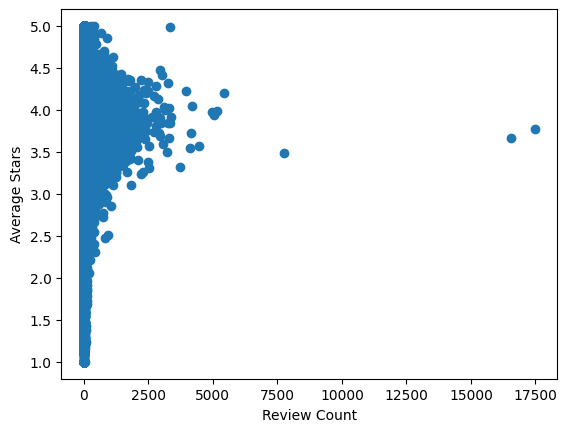

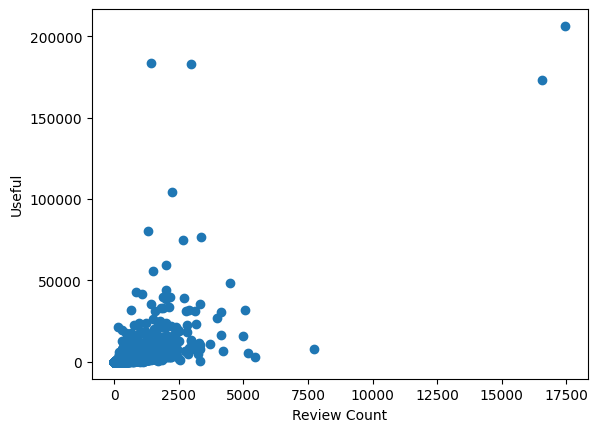

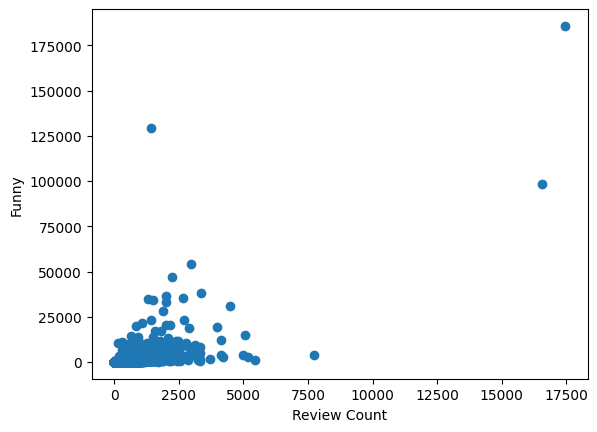

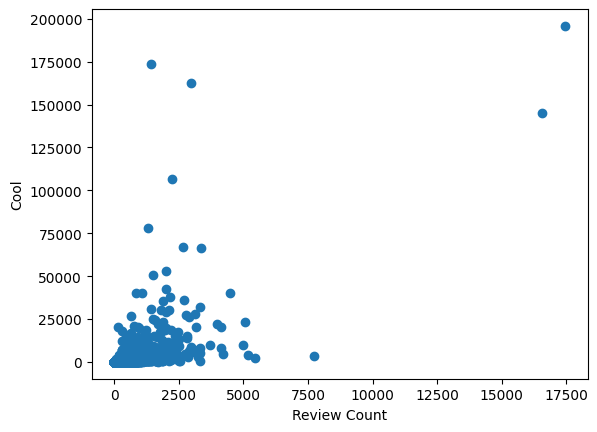

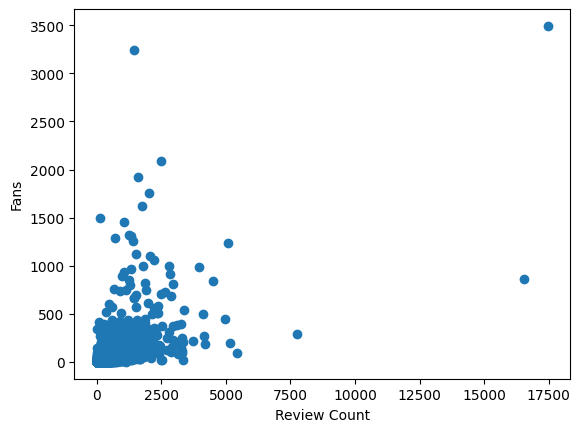

In [10]:
# scatterplot of review_count vs n_friends, n_elite, average_stars, useful, funny, cool, fans


plt.scatter(users_copy["review_count"], users_copy["n_friends"])
plt.xlabel("Review Count")
plt.ylabel("Number of Friends")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["n_elite"])
plt.xlabel("Review Count")
plt.ylabel("Number of Elite Years")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["average_stars"])
plt.xlabel("Review Count")
plt.ylabel("Average Stars")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["useful"])
plt.xlabel("Review Count")
plt.ylabel("Useful")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["funny"])
plt.xlabel("Review Count")
plt.ylabel("Funny")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["cool"])
plt.xlabel("Review Count")
plt.ylabel("Cool")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["fans"])
plt.xlabel("Review Count")
plt.ylabel("Fans")
plt.show()




In [30]:
# removing outliers

users_copy = users_copy[users_copy["review_count"] < 6000]
users_copy = users_copy[users_copy["useful"] < 125000]
users_copy = users_copy[users_copy["funny"] < 60000]
users_copy = users_copy[users_copy["cool"] < 120000]
users_copy = users_copy[users_copy["fans"] < 2500]


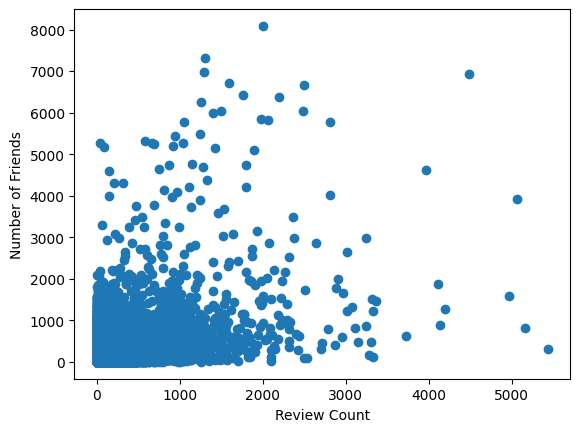

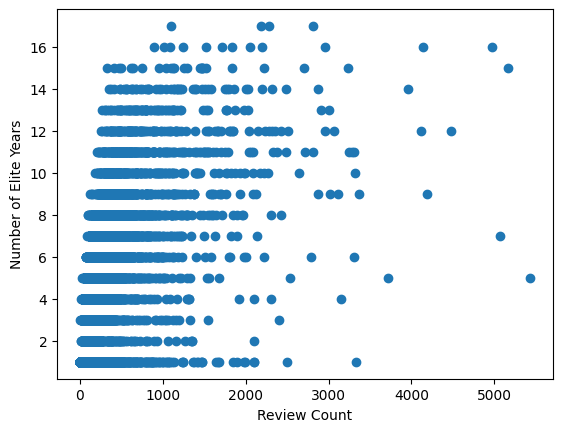

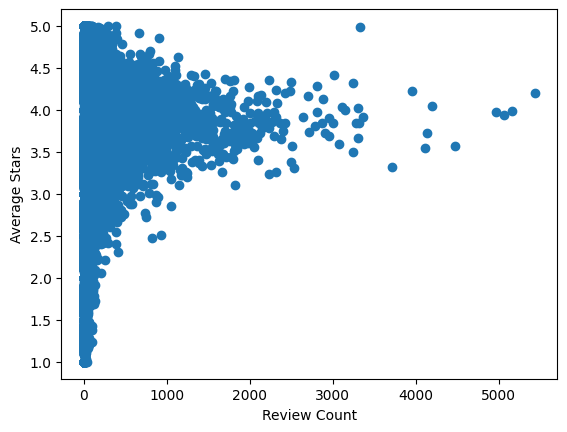

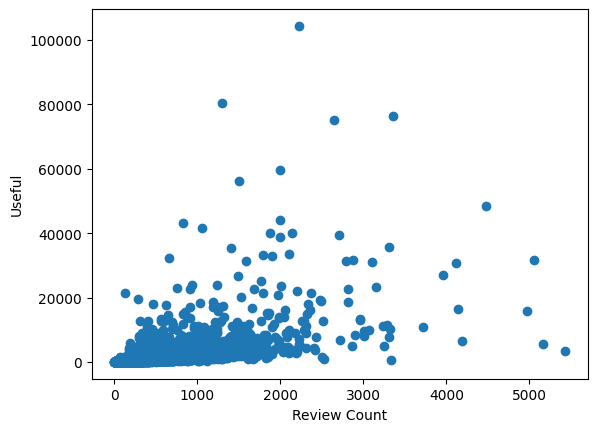

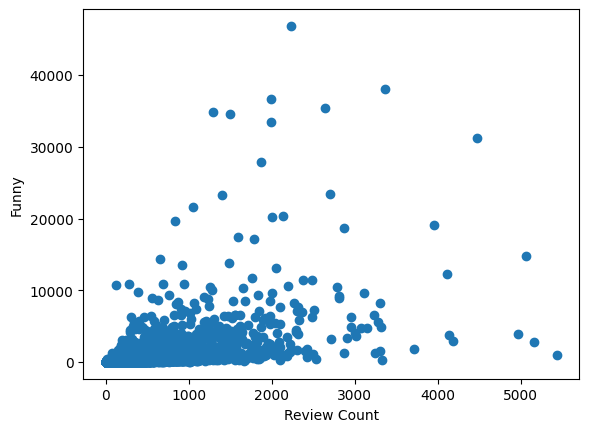

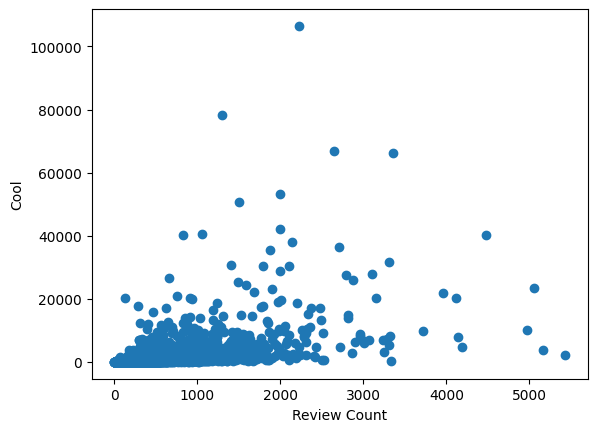

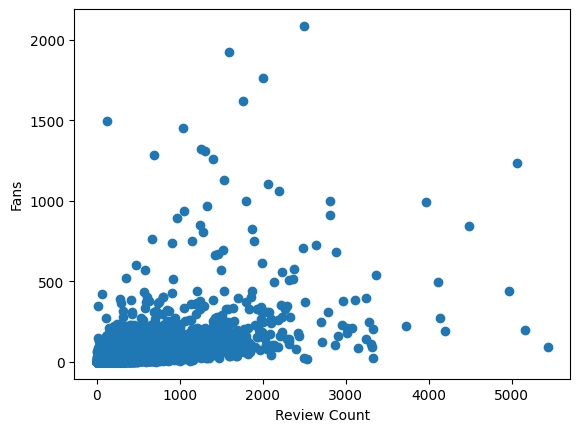

In [14]:
# repeating the scatterplots

plt.scatter(users_copy["review_count"], users_copy["n_friends"])
plt.xlabel("Review Count")
plt.ylabel("Number of Friends")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["n_elite"])
plt.xlabel("Review Count")
plt.ylabel("Number of Elite Years")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["average_stars"])
plt.xlabel("Review Count")
plt.ylabel("Average Stars")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["useful"])
plt.xlabel("Review Count")
plt.ylabel("Useful")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["funny"])
plt.xlabel("Review Count")
plt.ylabel("Funny")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["cool"])
plt.xlabel("Review Count")
plt.ylabel("Cool")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["fans"])
plt.xlabel("Review Count")
plt.ylabel("Fans")
plt.show()

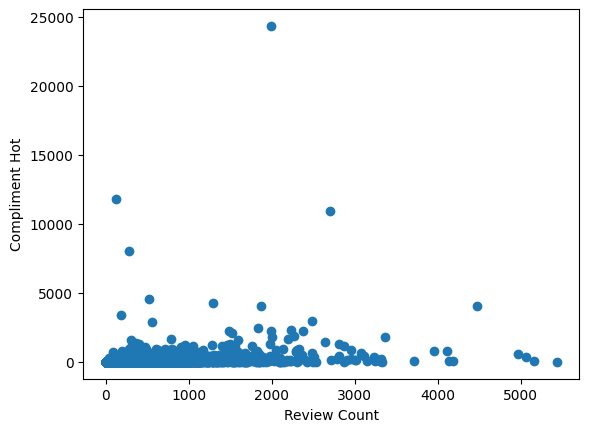

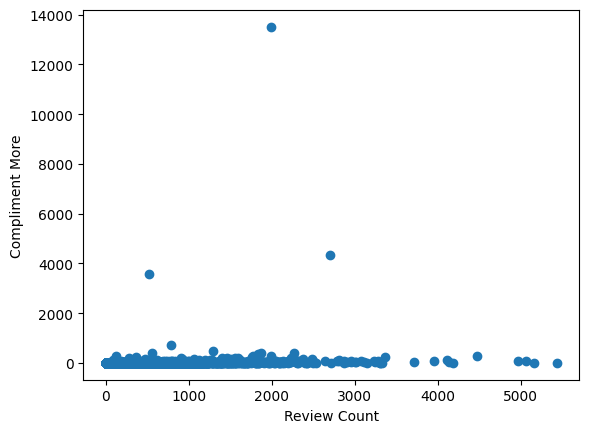

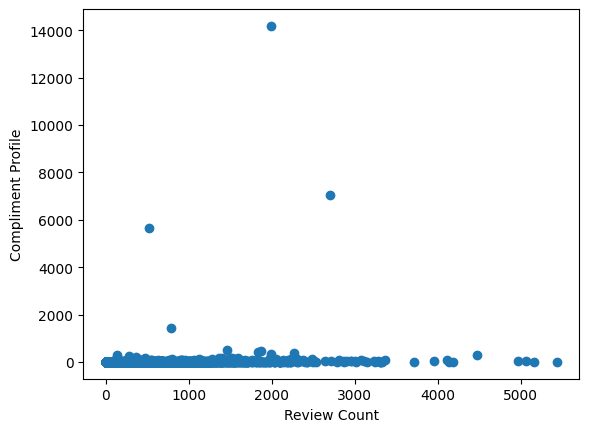

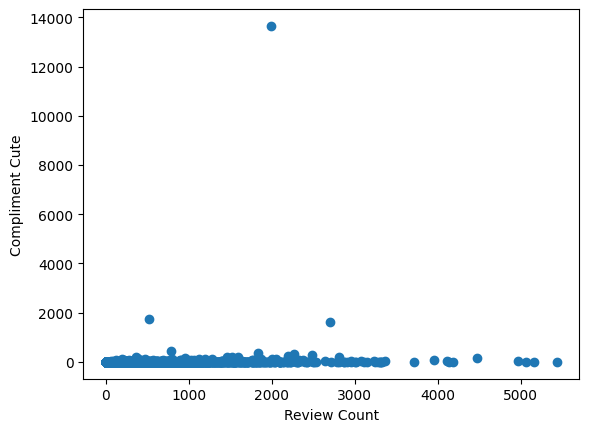

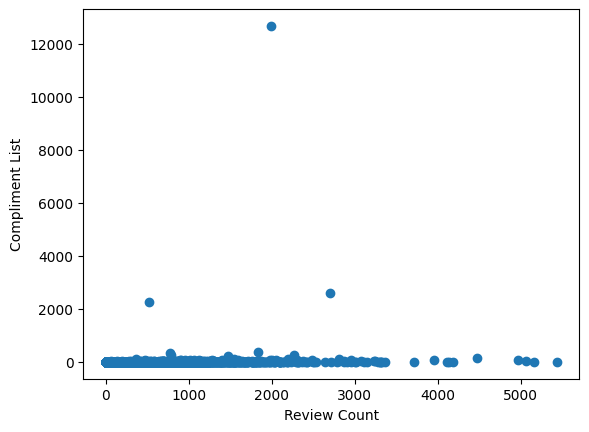

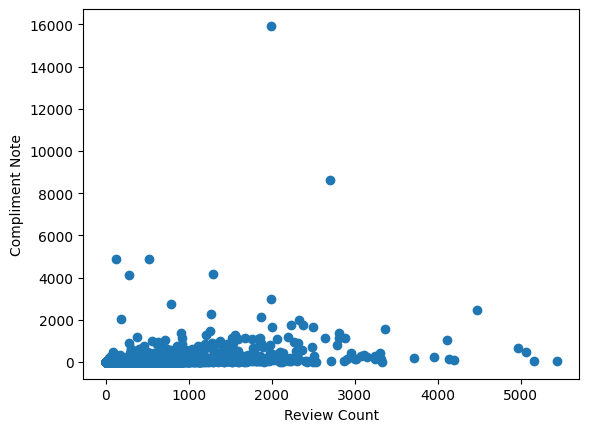

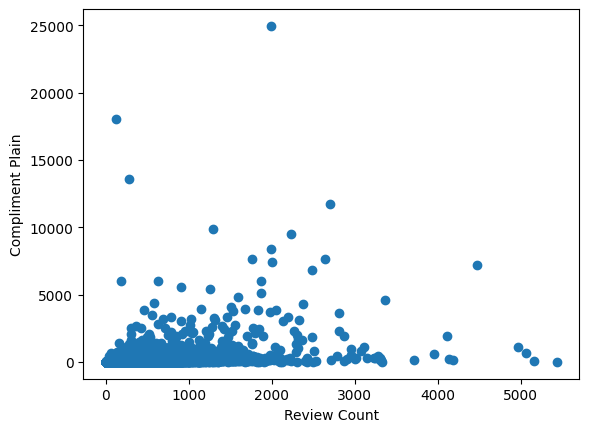

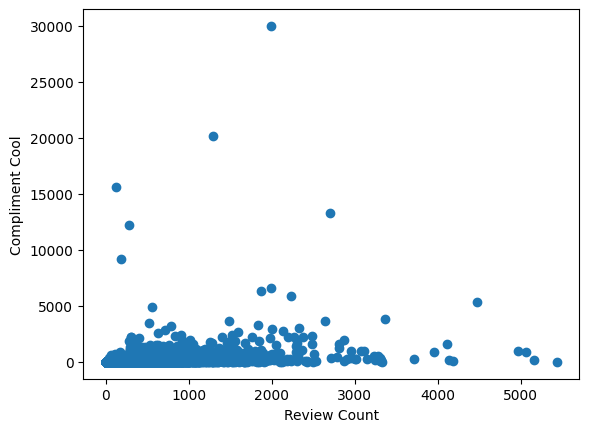

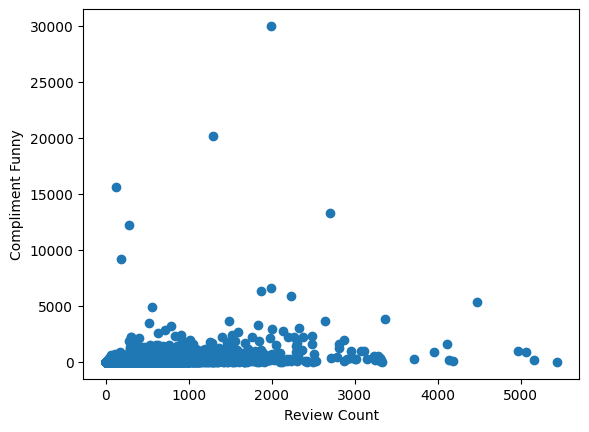

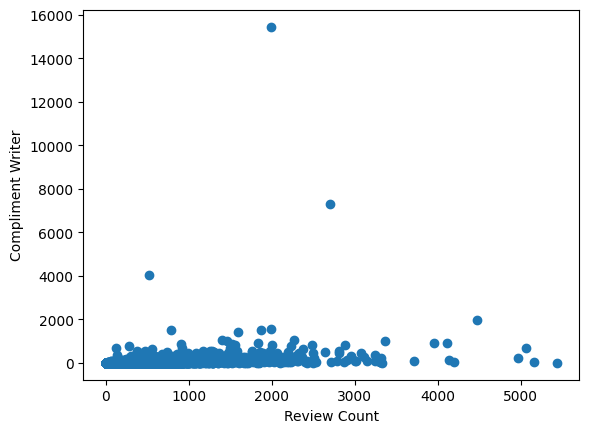

In [15]:
# scatterplot of review_count vs all the compliments columns

plt.scatter(users_copy["review_count"], users_copy["compliment_hot"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Hot")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_more"])
plt.xlabel("Review Count")
plt.ylabel("Compliment More")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_profile"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Profile")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_cute"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Cute")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_list"])
plt.xlabel("Review Count")
plt.ylabel("Compliment List")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_note"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Note")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_plain"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Plain")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_cool"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Cool")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_funny"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Funny")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_writer"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Writer")
plt.show()



In [31]:
# removing outliers

users_copy = users_copy[users_copy["compliment_hot"] < 5000]
users_copy = users_copy[users_copy["compliment_more"] < 2000]
users_copy = users_copy[users_copy["compliment_profile"] < 1000]
users_copy = users_copy[users_copy["compliment_cute"] < 1000]
users_copy = users_copy[users_copy["compliment_list"] < 1000]
users_copy = users_copy[users_copy["compliment_note"] < 6000]
users_copy = users_copy[users_copy["compliment_plain"] < 11000]
users_copy = users_copy[users_copy["compliment_cool"] < 7000]
users_copy = users_copy[users_copy["compliment_funny"] < 8000]
users_copy = users_copy[users_copy["compliment_writer"] < 3000]

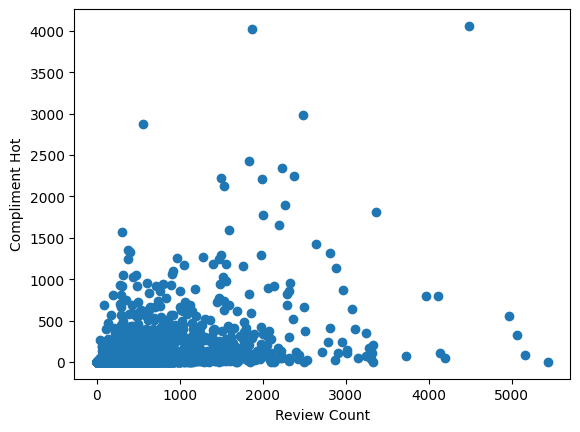

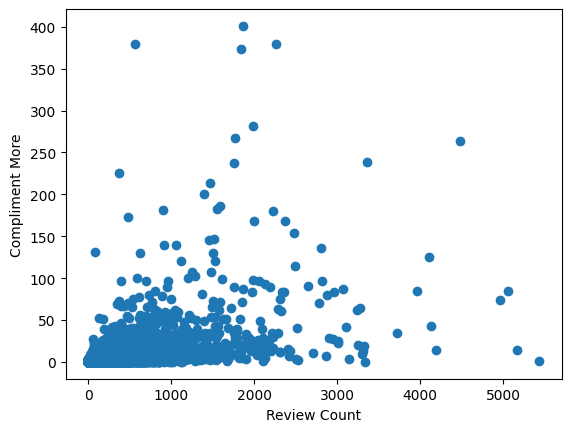

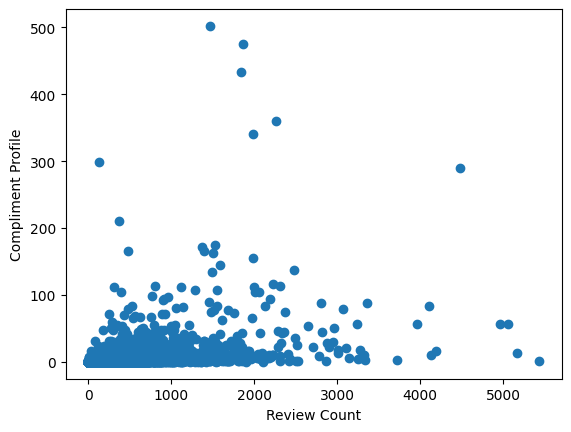

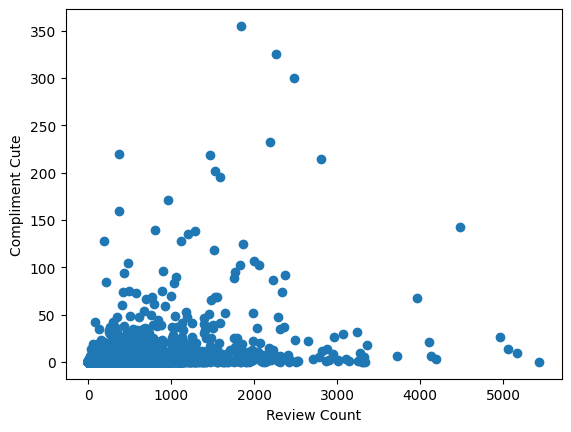

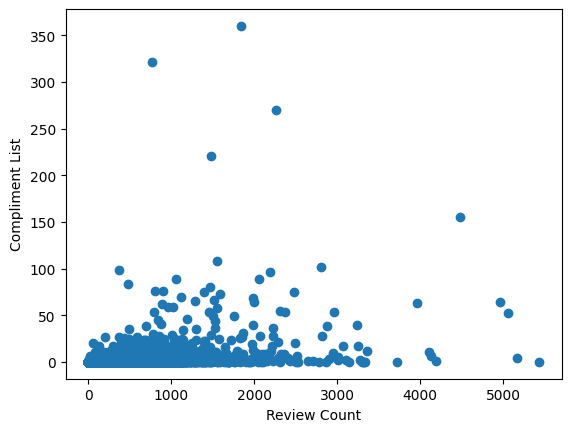

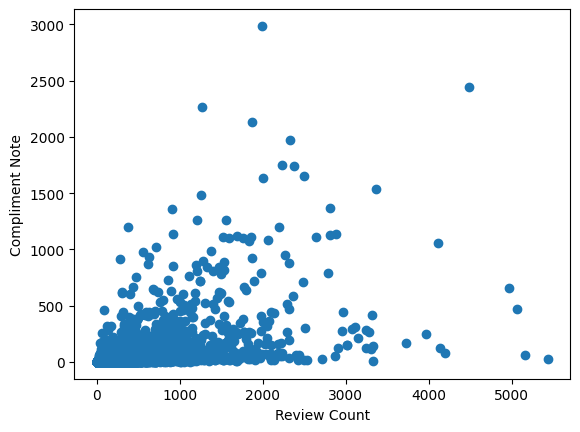

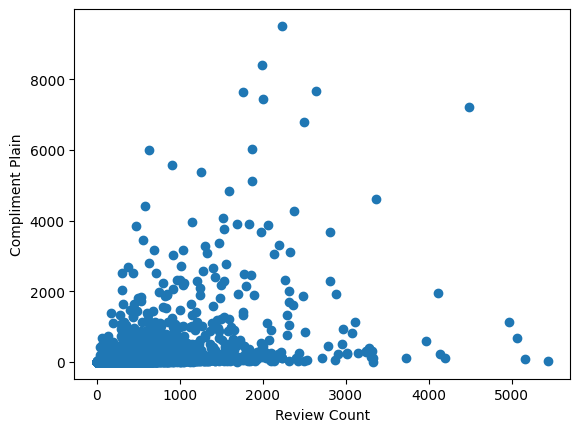

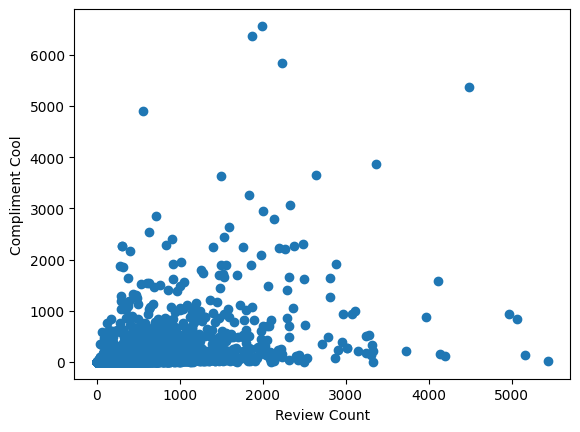

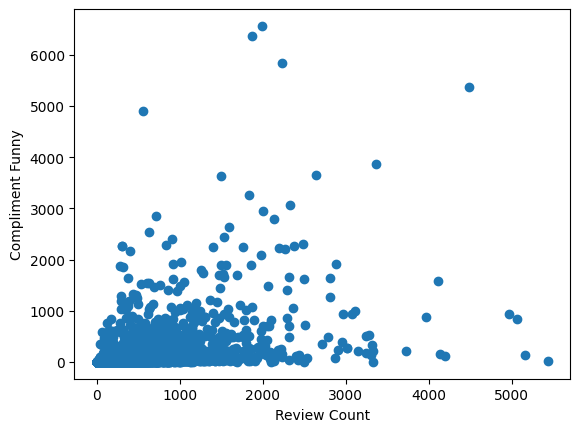

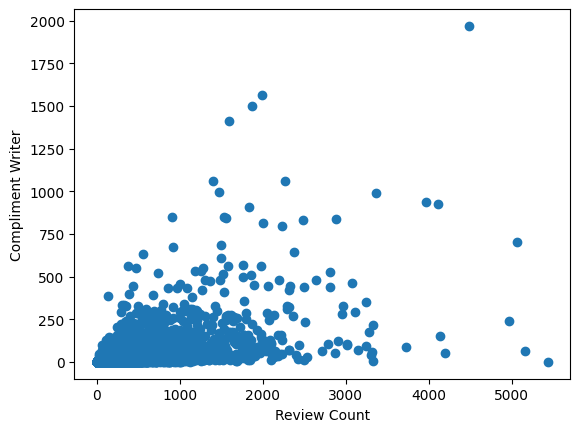

In [17]:

plt.scatter(users_copy["review_count"], users_copy["compliment_hot"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Hot")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_more"])
plt.xlabel("Review Count")
plt.ylabel("Compliment More")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_profile"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Profile")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_cute"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Cute")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_list"])
plt.xlabel("Review Count")
plt.ylabel("Compliment List")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_note"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Note")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_plain"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Plain")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_cool"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Cool")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_funny"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Funny")
plt.show()

plt.scatter(users_copy["review_count"], users_copy["compliment_writer"])
plt.xlabel("Review Count")
plt.ylabel("Compliment Writer")
plt.show()

In [19]:
users_copy.to_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\users_cleaned.csv", index=False)

CORRELATION MATRIX

In [76]:
users_copy = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\users_cleaned.csv")

In [77]:
users_copy.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,n_friends,n_elite
0,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,2010-06-14 21:44:28,555,141,203,5,3.52,10,...,0,0,11,8,21,21,12,0,181,2
1,OlJ9vcVFB1iEKcZO-MS3cQ,Joz Joz Joz,348,2006-03-03 08:10:12,2063,1260,1537,116,3.93,319,...,47,6,183,543,462,462,87,29,1878,7


In [34]:
user_scaled = users_copy.copy()

In [35]:
# remove user_id, name, yelping_since columns

user_scaled.drop(columns=["user_id", "name", "yelping_since"], inplace=True)


In [36]:
# scaling the data
scaler = StandardScaler()

user_scaled = pd.DataFrame(scaler.fit_transform(user_scaled), columns=user_scaled.columns)


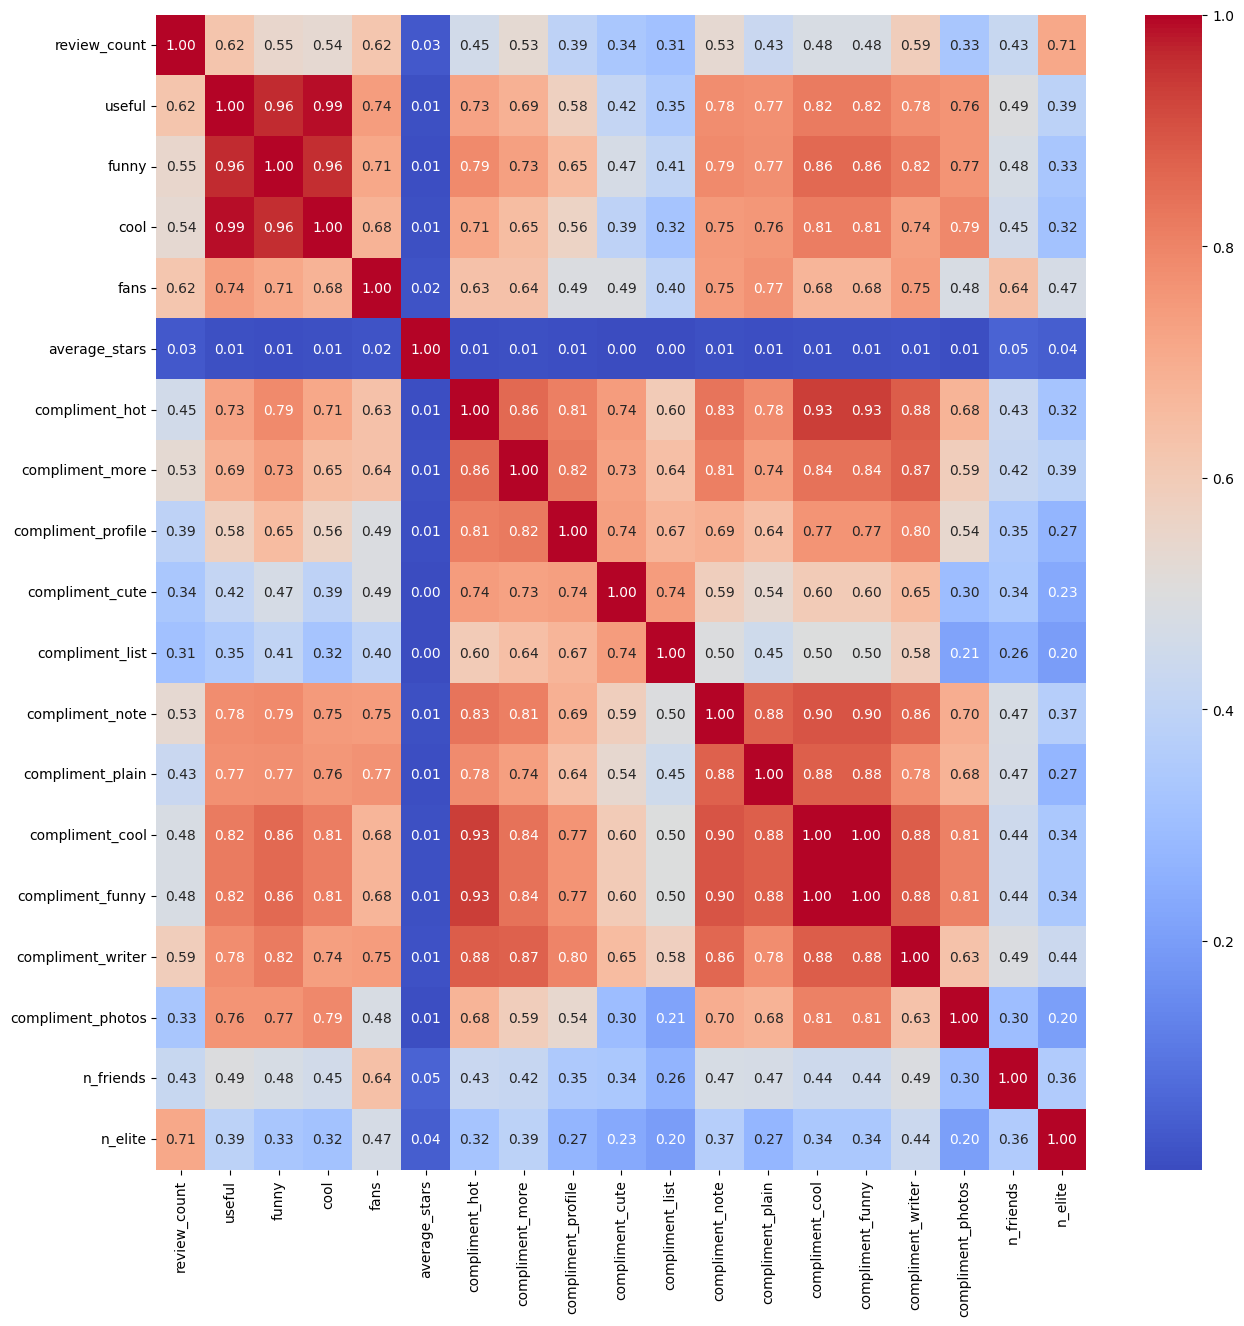

In [37]:
# creating correlation matrix

corr = user_scaled.corr()

# plotting the correlation matrix

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



PCA DIMENSIONS REDUCTION (based on correlation matrix)

In [46]:
user_pca = users_copy.copy()

In [47]:
# PCA reduction of user interactions: useful, funny, cool

pca = PCA(n_components=1)

user_interactions = user_pca[["useful", "funny", "cool"]]
user_interactions_pca = pca.fit_transform(user_interactions)

user_pca["user_interactions"] = user_interactions_pca
print("pcs.components: ", pca.components_)
print("explained_variance_ratio: ", pca.explained_variance_ratio_)



pcs.components:  [[0.71584473 0.34175471 0.60890889]]
explained_variance_ratio:  [0.98740118]


In [48]:
# drop useful, funny, cool

user_pca.drop(columns=["useful", "funny", "cool"], inplace=True)

In [49]:
# PCA All compliments columns

pca = PCA(n_components=1)

user_compliments = user_pca[["compliment_hot", "compliment_more", "compliment_profile", "compliment_cute", "compliment_list", "compliment_note", "compliment_plain", "compliment_cool", "compliment_funny", "compliment_writer"]]

user_compliments_pca = pca.fit_transform(user_compliments)

user_pca["user_compliments"] = user_compliments_pca

print("pca.components: ", pca.components_)
print("explained_variance_ratio: ", pca.explained_variance_ratio_)


pca.components:  [[0.24720471 0.02502032 0.02027491 0.01266083 0.00778119 0.20396624
  0.68116145 0.45702645 0.45702645 0.1195926 ]]
explained_variance_ratio:  [0.92079084]


In [50]:
# drop all compliments columns

user_pca.drop(columns=["compliment_hot", "compliment_more", "compliment_profile", "compliment_cute", "compliment_list", "compliment_note", "compliment_plain", "compliment_cool", "compliment_funny", "compliment_writer"], inplace=True)

In [51]:
# PCA Social Status: fans, n_friends

pca = PCA(n_components=1)

user_social_status = user_pca[["fans", "n_friends"]]
user_social_status_pca = pca.fit_transform(user_social_status)

user_pca["user_social_status"] = user_social_status_pca

print("pca.components: ", pca.components_)
print("explained_variance_ratio: ", pca.explained_variance_ratio_)

pca.components:  [[0.07867034 0.99690069]]
explained_variance_ratio:  [0.9913444]


In [52]:
# drop fans, n_friends

user_pca.drop(columns=["fans", "n_friends"], inplace=True)

In [53]:
# pca for review count and elite

pca = PCA(n_components=1)

user_review_elite = user_pca[["review_count", "n_elite"]]
user_review_elite_pca = pca.fit_transform(user_review_elite)

user_pca["user_review_elite"] = user_review_elite_pca

print("pca.components: ", pca.components_)
print("explained_variance_ratio: ", pca.explained_variance_ratio_)

# drop review_count, n_elite

user_pca.drop(columns=["review_count", "n_elite"], inplace=True)

pca.components:  [[0.99997376 0.0072438 ]]
explained_variance_ratio:  [0.99994901]


In [54]:
user_pca.head(2)

,user_id,name,yelping_since,average_stars,compliment_photos,user_interactions,user_compliments,user_social_status,user_review_elite
0,FT9CFS39sjZxVjCTrDHmdg,Stephanie,2010-06-14 21:44:28,3.52,0,488.626411,23.172869,117.303892,167.001720
1,OlJ9vcVFB1iEKcZO-MS3cQ,Joz Joz Joz,2006-03-03 08:10:12,3.93,29,2762.828249,913.119291,1817.776764,314.034082


In [55]:
# drop user_id, name, uelping_since, compliment_photo

user_pca.drop(columns=["user_id", "name", "yelping_since","average_stars", "compliment_photos"], inplace=True)

In [56]:
user_pca.head(3)

,user_interactions,user_compliments,user_social_status,user_review_elite
0,488.626411,23.172869,117.303892,167.001720
1,2762.828249,913.119291,1817.776764,314.034082
2,15351.662223,1628.707826,958.519668,2254.055621


CLUSTERIZATION WITH KMEANS  

In [58]:
inertia = []
silhouette = []

for k in range(2, 11):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(user_pca)

    inertia.append(pipeline.named_steps["kmeans"].inertia_)
    silhouette.append(silhouette_score(user_pca, pipeline.named_steps["kmeans"].labels_))

    

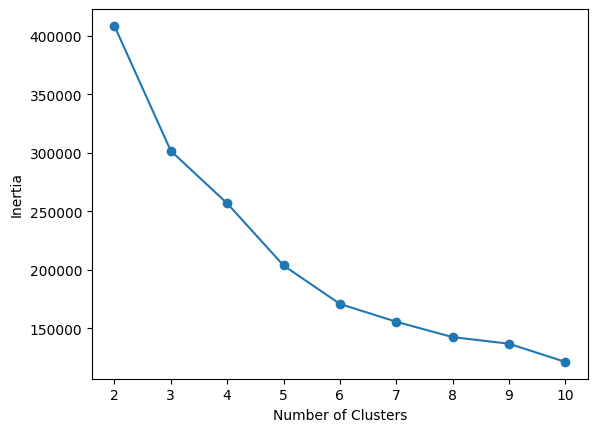

In [59]:
plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


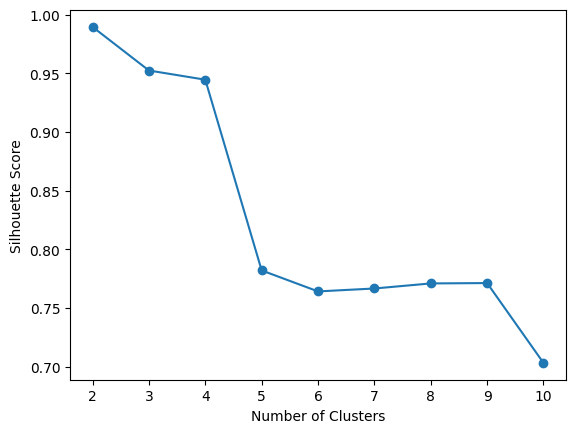

In [60]:
plt.plot(range(2, 11), silhouette, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [61]:
# keeping 3 clusters

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=42)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(user_pca)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [62]:
pd.Series(pipeline.named_steps["kmeans"].labels_).value_counts()

0    157300
2      1521
1        77
Name: count, dtype: int64

In [63]:
user_pca["cluster"] = pipeline.named_steps["kmeans"].labels_

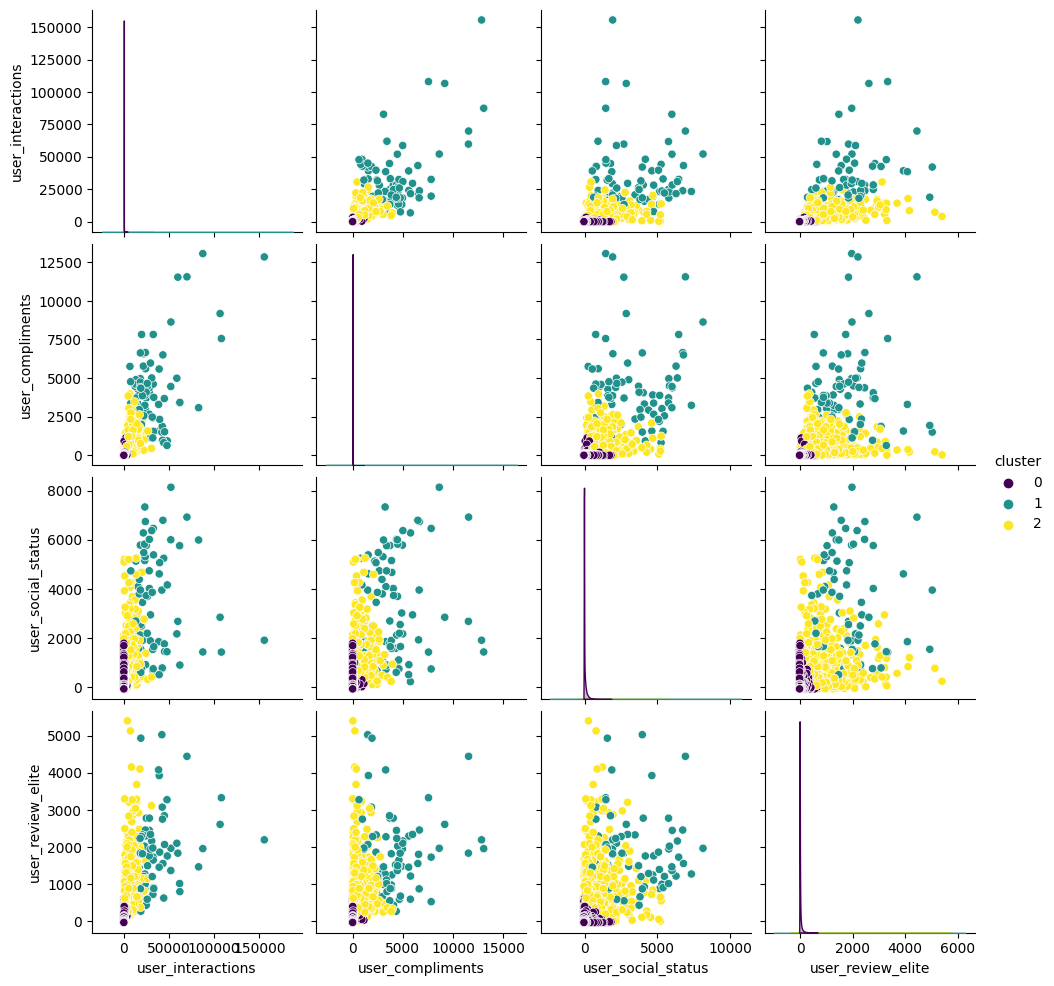

In [64]:
# plotting the clusters

sns.pairplot(user_pca, hue="cluster", palette="viridis")

In [65]:
users_copy["cluster"] = user_pca["cluster"]

In [66]:
users_copy.to_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\users_clustered_final.csv", index=False)